In [1]:
%cd ..
from google.colab import drive
drive.mount("/content/gdrive")

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# rename the path /content/gdrive/My\ Drive/ to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls /mydrive/Data_Science_Projects/Computer_Price_Prediction/data

ComputerPricesData.csv


In [5]:
path = "/mydrive/Data_Science_Projects/Computer_Price_Prediction/data/"

df = pd.read_csv(path + "ComputerPricesData.csv")
print(df.shape)
print(df.head())
print(df.describe())

(6259, 10)
   price  speed   hd  ram  screen  cd multi premium  ads  trend
0   1499     25   80    4      14  no    no     yes   94      1
1   1795     33   85    2      14  no    no     yes   94      1
2   1595     25  170    4      15  no    no     yes   94      1
3   1849     25  170    8      14  no    no      no   94      1
4   3295     33  340   16      14  no    no     yes   94      1
             price        speed  ...          ads        trend
count  6259.000000  6259.000000  ...  6259.000000  6259.000000
mean   2219.576610    52.011024  ...   221.301007    15.926985
std     580.803956    21.157735  ...    74.835284     7.873984
min     949.000000    25.000000  ...    39.000000     1.000000
25%    1794.000000    33.000000  ...   162.500000    10.000000
50%    2144.000000    50.000000  ...   246.000000    16.000000
75%    2595.000000    66.000000  ...   275.000000    21.500000
max    5399.000000   100.000000  ...   339.000000    35.000000

[8 rows x 7 columns]


##Summarize dataset:

- price: The Price of the computer

- speed: The speed

- hd: How much hard drive is present

- ram: How much ram is present in the computer

- screen: The screen size

- cd: Whether CD player is present or not

- multi: Are there multiple ports or not

- premium: If the computer premium quality

- ads: The ads value of the computer

- trend: The trend value of the computer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [7]:
from sklearn import preprocessing

label_enconder = preprocessing.LabelEncoder()
df['cd'] = label_enconder.fit_transform(df['cd'])
df['multi'] = label_enconder.fit_transform(df['multi'])
df['premium'] = label_enconder.fit_transform(df['premium'])

df.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1
5,3695,66,340,16,14,0,0,1,94,1
6,1720,25,170,4,14,1,0,1,94,1
7,1995,50,85,2,14,0,0,1,94,1
8,2225,50,210,8,14,0,0,1,94,1
9,2575,50,210,4,15,0,0,1,94,1


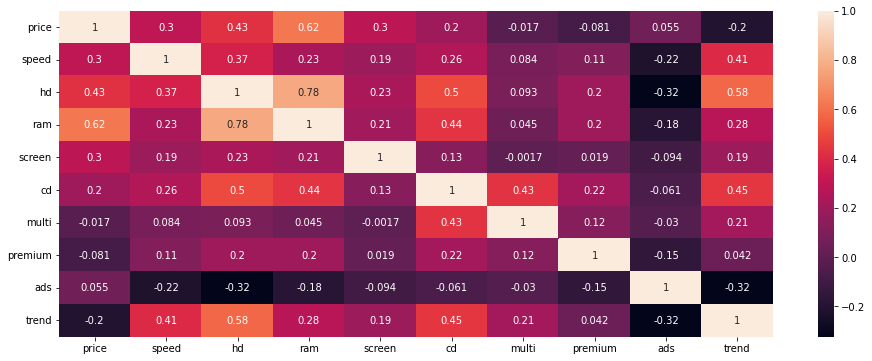

In [8]:
# correlation
corr = df.corr()

# heatmap
plt.figure(figsize=[16,6])
sns.heatmap(data= corr, annot=True)

In [9]:
!install pandas profilling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

install: cannot stat 'pandas': No such file or directory
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [10]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Report - Pandas Profilling', html={'style': {'full_width': True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
X = df.drop(['price','speed'], axis=1)
y = df['price']
X

,hd,ram,screen,cd,multi,premium,ads,trend
0,80,4,14,0,0,1,94,1
1,85,2,14,0,0,1,94,1
2,170,4,15,0,0,1,94,1
3,170,8,14,0,0,0,94,1
4,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...
6254,528,8,15,0,0,1,39,35
6255,850,16,15,1,1,1,39,35
6256,1200,24,15,1,0,1,39,35
6257,850,16,15,1,0,1,39,35


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.10, random_state=15)


## Random Florest

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Evaluate the model

In [14]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

evaluate = r2_score(y_test, y_pred)
print("R2 Score: ", evaluate)

R2 Score:  0.8443436042612873


In [15]:
# Cross validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(model, X, y, cv=10)
print("Accuracy {:.2f} %".format(accuracies.mean()*100))

Accuracy 68.47 %


## Save dataset

In [16]:
df.to_csv('/mydrive/Data_Science_Projects/Computer_Price_Prediction/data/data.csv', index=False)

In [17]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']